# Exercises for Lecture 9 (SVM)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2022-01-25 09:22:20


In [2]:
# Common imports
import os
import numpy as np
np.random.seed(0) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Again, consider the [wine recognition dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset):

In [3]:
from sklearn import datasets

wine = datasets.load_wine()
list(wine.keys())

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

In [4]:
wine['data'].shape

(178, 13)

Recall that this dataset is made up of 13 features. These features are the results of a chemical analysis of wines grown by three different cultivators in the same region in Italy:

In [5]:
wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Each of the 3 different wines is a class:

In [6]:
wine["target_names"]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Exercise 1: Using the `color_intensity` and the `hue` of the wines, train a Linear SVM classifier to classify `class_1` wines

### Set up and plot the training data

Don't forget that SVMs are very sensitive to feature scales.

Make sure to select the right features!

(Hint: all the information you need to select the correct features is above.)

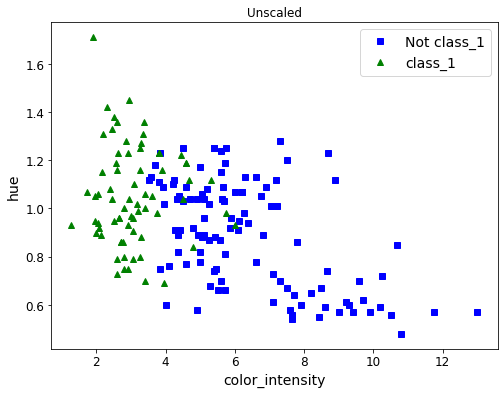

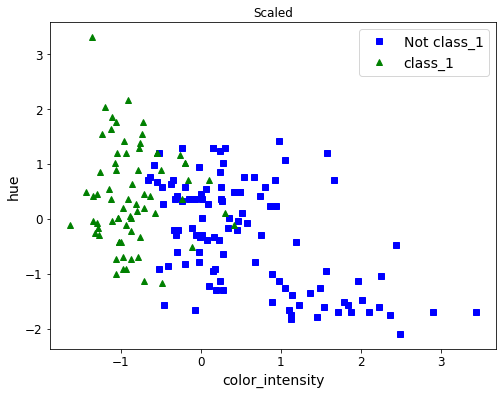

In [7]:
from sklearn.preprocessing import StandardScaler

def plot_features(x, y):
    plt.figure(figsize=(8, 6))
    
    plt.plot(x[y==0, 0], x[y==0, 1], "bs", label="Not class_1")
    plt.plot(x[y==1, 0], x[y==1, 1], "g^", label="class_1")
    
    plt.xlabel(wine["feature_names"][9], fontsize=14)
    plt.ylabel(wine["feature_names"][10], fontsize=14)
    plt.legend(fontsize=14)

X = wine["data"][:, (9, 10)]  # select `color_intensity` and `hue`
y = (wine["target"] == 1).astype(int)  # 1 if class_1, else 0

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plot_features(X, y)
plt.title("Unscaled")
plt.show()

plot_features(X_scaled, y)
plt.title("Scaled")
plt.show()

### Would hard or soft classification be more appropriate in this situation?

Soft since the data isn't linearly separable, so we can't impose that all samples be correctly classified.

### Train the SVM

Use inverse regularizatin `C=1`.

In [8]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_scaled, y)

SVC(C=1, kernel='linear')

### Plot the data and the decision boundary

(-2.0, 4.0, -3.0, 4.0)

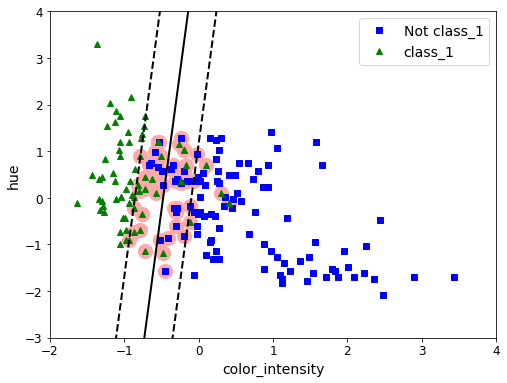

In [9]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # On the margin, w0*x0 + w1*x1 + b = +/- 1
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=200, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)



plot_features(X_scaled, y)
plot_svc_decision_boundary(svm_clf, -2, 4)
plt.axis([-2, 4, -3, 4])

## Exercise 2: Using the color_intensity and the hue of the wines, train a SVM classifier to classify class_1 wines using the kernel trick

Use the radial basis function and inverse regularization paremeter `C=1`.

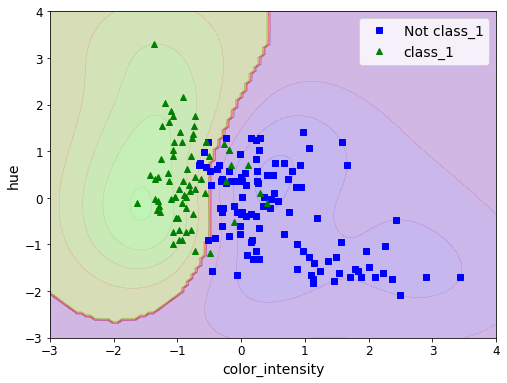

In [10]:
from sklearn.pipeline import Pipeline

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

kernel_svm_clf = SVC(kernel="rbf", C=1)
kernel_svm_clf.fit(X_scaled, y)

plot_features(X_scaled, y)
plot_predictions(kernel_svm_clf, [-3, 4, -3, 4])

### What are the advantages of using the kernel trick over polynomial features?

There can be a significant computational saving. But there aren't many samples here, so in this case it isn't so critical.

### You might like to try varying the amount of regularisation (the value of `C`), or the kernel used (`kernel`), and seeing how the predictions change.

For more information on the options for the `SVC` model see [the documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).